The procedure in this file is the same as the Binary_Classification.ipynb file except that the 10 labels are used instead of 2 labels.

In [2]:
import zipfile
import urllib.request
import shutil

print('Beginning file download with urllib...')

#Downloading
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip '
urllib.request.urlretrieve(url, '10_food_classes_all_data.zip')

#File Extraction
with zipfile.ZipFile("10_food_classes_all_data.zip","r") as zip_ref:
    zip_ref.extractall()

#Removing the unwanted folder
file_path = '__MACOSX'
shutil.rmtree(file_path)

Beginning file download with urllib...


In [3]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [4]:
import os
Class_names = sorted(os.listdir('10_food_classes_all_data/test/'))[1:]
Class_names

['chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

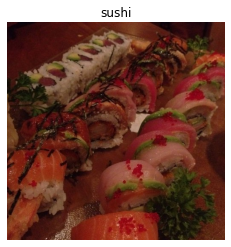

In [5]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

def view_random_image(target_dir, target_class):
  target_path = target_dir + target_class

  img = random.sample(os.listdir(target_path),1)[0]
  img = mpimg.imread(target_path + "/" + img)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')


img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(Class_names))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255., 
                                rotation_range=20, 
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.2, 
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(directory = train_dir, target_size=(224, 224), class_mode='categorical',  batch_size=32)
test_data = test_datagen.flow_from_directory(directory = test_dir, target_size=(224, 224), class_mode='categorical',  batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
      Conv2D(filters = 30, kernel_size = 3, input_shape = (224, 224,3),  activation = 'relu'),
      MaxPool2D(pool_size = 3, padding = 'valid'),
      Dense(50, activation = 'relu'),
      
      Conv2D(filters = 30, kernel_size = 3,  activation = 'relu'),
      MaxPool2D(pool_size = 3, padding = 'valid'),
      Dense(50, activation = 'relu'),

      Conv2D(filters = 30, kernel_size = 3,  activation = 'relu'),
      MaxPool2D(pool_size = 3, padding = 'valid'),
      Dense(50, activation = 'relu'),

      Flatten(),
      Dense(10, activation = 'softmax')
])

callback_1 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=0)
callback_2 = tf.keras.callbacks.ModelCheckpoint(filepath='model_Multiclass/model_1-epoch-{epoch:02d}-val_loss-{val_loss:.4f}.h5', save_weights_only=False, verbose=0)


model_1.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])



In [14]:
history = model_1.fit(train_data, epochs = 50, callbacks=[callback_1, callback_2], steps_per_epoch = len(train_data), validation_data = test_data, shuffle=True, use_multiprocessing=False, validation_steps = len(test_data))


Epoch 1/50
235/235 [==============================] - 140s 595ms/step - loss: 1.5605 - accuracy: 0.4732 - val_loss: 1.4906 - val_accuracy: 0.5176
Epoch 2/50
235/235 [==============================] - 136s 576ms/step - loss: 1.5204 - accuracy: 0.4893 - val_loss: 1.4582 - val_accuracy: 0.5320
Epoch 3/50
235/235 [==============================] - 135s 572ms/step - loss: 1.4865 - accuracy: 0.5028 - val_loss: 1.2632 - val_accuracy: 0.5876
Epoch 4/50
235/235 [==============================] - 135s 573ms/step - loss: 1.5078 - accuracy: 0.4909 - val_loss: 1.3289 - val_accuracy: 0.5712
Epoch 5/50
235/235 [==============================] - 136s 578ms/step - loss: 1.4720 - accuracy: 0.5093 - val_loss: 1.3130 - val_accuracy: 0.5836
Epoch 6/50
235/235 [==============================] - 136s 579ms/step - loss: 1.4440 - accuracy: 0.5217 - val_loss: 1.3620 - val_accuracy: 0.5728
Epoch 7/50
235/235 [==============================] - 137s 583ms/step - loss: 1.4369 - accuracy: 0.5224 - val_loss: 1.5483 -

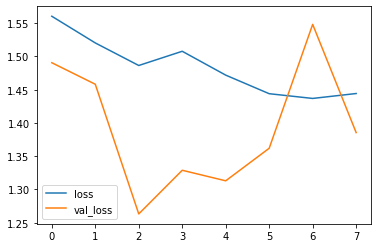

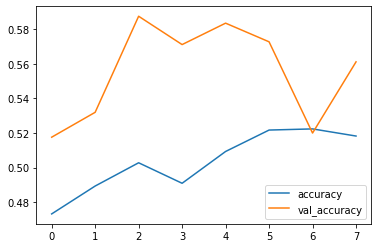

In [15]:
plt.figure()
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(['loss', 'val_loss'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [16]:
model_load = tf.keras.models.load_model('model_Multiclass\model_1-epoch-05-val_loss-1.3130.h5')

prediction values by the model [0.38869053 0.24787742 0.08323875 0.07848394 0.09120139 0.02432023
 0.01793828 0.0401933  0.01674315 0.011313  ]


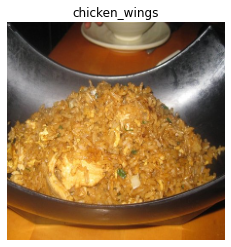

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_single_image(img_path):
  img = mpimg.imread(img_path)
  img = tf.image.resize(img, (224,224))
  img = img/255.
  
  pred = tf.squeeze(model_load.predict(tf.expand_dims(img, axis=0)))
  print(f"prediction values by the model {pred}")
  pred = Class_names[tf.math.argmax(pred)]
  plt.title(pred)
  plt.imshow(img)
  plt.axis('off')
  return img

#Make sure to include \\ for path directories as a single slash for \train might be intrepreted as a tab space.
#change the directory for other samples
path = "10_food_classes_all_data\\test\\fried_rice\\"
img = predict_single_image(path + random.choice(os.listdir(path)))

In [28]:
test_features, test_labels = test_data.next()
predictions_labels = tf.round(tf.squeeze(model_load.predict(test_features)))

In [30]:
model_load.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.3130 - accuracy: 0.5836


[1.3130278587341309, 0.5835999846458435]

The results seems to be very in accurate and hence further investigation is required in model architecture.